| ক্রম | Bit Plane         | তুমি কী দেখবে                                              |
| ---- | ----------------- | ---------------------------------------------------------- |
| 1️⃣  | Original          | আসল grayscale `boy.png` ছবি                                |
| 2️⃣  | Bit Plane 7 (MSB) | সবচেয়ে গাঢ় ও মুখের প্রধান বৈশিষ্ট্য (চোখ, চুল, মুখের আকার) |
| 3️⃣  | Bit Plane 6       | মাঝারি গাঢ় অংশ (চোখ, নাক, গালের ছায়া ইত্যাদি)              |
| 4️⃣  | Bit Plane 5       | কিছু গঠন, কিন্তু আরো হালকা                                 |
| 5️⃣  | Bit Plane 4       | আরেকটু হালকা বৈশিষ্ট্য                                     |
| 6️⃣  | Bit Plane 3       | হালকা রেখা বা texture                                      |
| 7️⃣  | Bit Plane 2       | অল্প কিছু noise বা texture                                 |
| 8️⃣  | Bit Plane 1       | অনেকটাই সাদা/কালো random dot                               |
| 9️⃣  | Bit Plane 0 (LSB) | প্রায় noise-এর মতো, বোঝা যাবে না তেমন কিছু                |


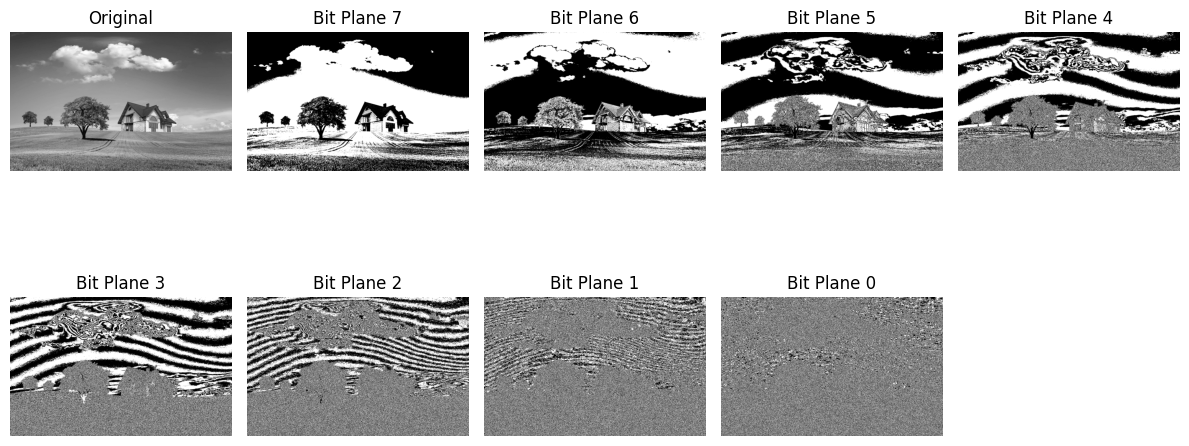

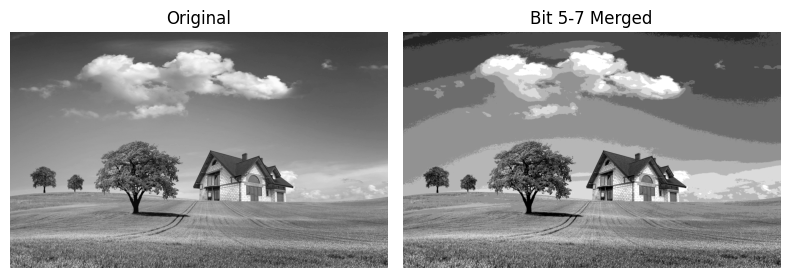

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Grayscale image লোড করো
image = cv2.imread('nature3.png', cv2.IMREAD_GRAYSCALE)


bit_planes = []

# Bit Plane বের করা (0 থেকে 7)
for i in range(8):
    # পিক্সেলগুলিকে ডানদিকে i বার শিফট করো, এবং শেষে 1 দিয়ে AND করো
    bit_plane = (image >> i) & 1
    # 0/1 কে 0/255 তে রূপান্তর করো display এর জন্য
    bit_plane = bit_plane * 255
    bit_planes.append(bit_plane.astype(np.uint8))

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 5, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')


for i in range(8):
    plt.subplot(2, 5, i+2)
    plt.imshow(bit_planes[7 - i], cmap='gray')
    plt.title(f'Bit Plane {7 - i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# খালি ইমেজ তৈরি করো মিশ্রণের জন্য
merged = np.zeros_like(image)

# Bit 5, 6, 7 মিশ্রণ (তাদের সঠিক position-এ shift করে)
for i in [5, 6, 7]:
    bit_plane = (image >> i) & 1  # ঐ বিট বের করো
    merged |= (bit_plane << i)  # আবার নিজ অবস্থানে বসাও

# দেখাও
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(merged, cmap='gray')
plt.title("Bit 5-7 Merged")
plt.axis('off')

plt.tight_layout()
plt.show()


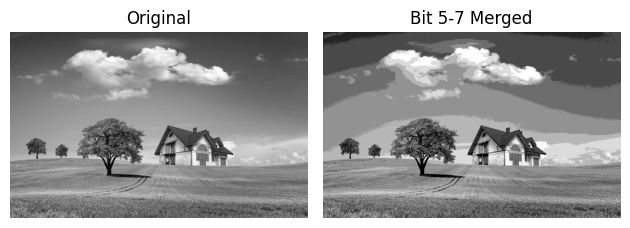

In [13]:


# খালি ইমেজ তৈরি করো মিশ্রণের জন্য
merged = np.zeros_like(img)

# Bit 5, 6, 7 মিশ্রণ (তাদের সঠিক position-এ shift করে)
for i in [5, 6, 7]:
    bit_plane = (img >> i) & 1  # ঐ বিট বের করো
    merged |= (bit_plane << i)  # আবার নিজ অবস্থানে বসাও

# দেখাও
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title("Original"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(merged, cmap='gray'), plt.title("Bit 5-7 Merged"), plt.axis('off')
plt.tight_layout()
plt.show()
